In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
library(knitr)

In [3]:
library(plotrix)

In [4]:
##importing data set in rstudio
cause_of_deaths <- read.csv("cause_of_deaths.csv")
data<-cause_of_deaths

In [5]:
##Header of data
kable(t(head(data)),horizontal=T)



|                                           |1           |2           |3           |4           |5           |6           |
|:------------------------------------------|:-----------|:-----------|:-----------|:-----------|:-----------|:-----------|
|Country.Territory                          |Afghanistan |Afghanistan |Afghanistan |Afghanistan |Afghanistan |Afghanistan |
|Code                                       |AFG         |AFG         |AFG         |AFG         |AFG         |AFG         |
|Year                                       |1990        |1991        |1992        |1993        |1994        |1995        |
|Meningitis                                 |2159        |2218        |2475        |2812        |3027        |3102        |
|Alzheimer.s.Disease.and.Other.Dementias    |1116        |1136        |1162        |1187        |1211        |1225        |
|Parkinson.s.Disease                        |371         |374         |378         |384         |391         |394         |
|Nutri

In [6]:
glimpse(data)

Observations: 6,120
Variables: 34
$ Country.Territory                          <fct> Afghanistan, Afghanistan...
$ Code                                       <fct> AFG, AFG, AFG, AFG, AFG,...
$ Year                                       <int> 1990, 1991, 1992, 1993, ...
$ Meningitis                                 <int> 2159, 2218, 2475, 2812, ...
$ Alzheimer.s.Disease.and.Other.Dementias    <int> 1116, 1136, 1162, 1187, ...
$ Parkinson.s.Disease                        <int> 371, 374, 378, 384, 391,...
$ Nutritional.Deficiencies                   <int> 2087, 2153, 2441, 2837, ...
$ Malaria                                    <int> 93, 189, 239, 108, 211, ...
$ Drowning                                   <int> 1370, 1391, 1514, 1687, ...
$ Interpersonal.Violence                     <int> 1538, 2001, 2299, 2589, ...
$ Maternal.Disorders                         <int> 2655, 2885, 3315, 3671, ...
$ HIV.AIDS                                   <int> 34, 41, 48, 56, 63, 71, ...
$ Drug.Use.Disorde

In [7]:
##Checking Dimensions of data
dim(data)

[1] 6120   34

In [8]:
##Checking NA values from our dataset
summarise(data,count=sum(is.na(data)))

count
0


In [9]:
##Finding the data type in each Column
kable(sapply(data,typeof))



|                                           |x       |
|:------------------------------------------|:-------|
|Country.Territory                          |integer |
|Code                                       |integer |
|Year                                       |integer |
|Meningitis                                 |integer |
|Alzheimer.s.Disease.and.Other.Dementias    |integer |
|Parkinson.s.Disease                        |integer |
|Nutritional.Deficiencies                   |integer |
|Malaria                                    |integer |
|Drowning                                   |integer |
|Interpersonal.Violence                     |integer |
|Maternal.Disorders                         |integer |
|HIV.AIDS                                   |integer |
|Drug.Use.Disorders                         |integer |
|Tuberculosis                               |integer |
|Cardiovascular.Diseases                    |integer |
|Lower.Respiratory.Infections               |integer |
|Neonata

In [10]:
##Renaming Column from Country/Territory to Country
colnames(data)[1]<-"Country"
colnames(data)

[1] "Country"                                   
 [2] "Code"                                      
 [3] "Year"                                      
 [4] "Meningitis"                                
 [5] "Alzheimer.s.Disease.and.Other.Dementias"   
 [6] "Parkinson.s.Disease"                       
 [7] "Nutritional.Deficiencies"                  
 [8] "Malaria"                                   
 [9] "Drowning"                                  
[10] "Interpersonal.Violence"                    
[11] "Maternal.Disorders"                        
[12] "HIV.AIDS"                                  
[13] "Drug.Use.Disorders"                        
[14] "Tuberculosis"                              
[15] "Cardiovascular.Diseases"                   
[16] "Lower.Respiratory.Infections"              
[17] "Neonatal.Disorders"                        
[18] "Alcohol.Use.Disorders"                     
[19] "Self.harm"                                 
[20] "Exposure.to.Forces.of.Nature"              
[21] "Diarrheal.Diseases"                        
[22] "Environmental.Heat.and.Cold.Exposure"      
[23] "Neoplasms"                                 
[24] "Conflict.and.Terrorism"                    
[25] "Diabetes.Mellitus"                         
[26] "Chronic.Kidney.Disease"                    
[27] "Poisonings"                                
[28] "Protein.Energy.Malnutrition"               
[29] "Road.Injuries"                             
[30] "Chronic.Respiratory.Diseases"              
[31] "Cirrhosis.and.Other.Chronic.Liver.Diseases"
[32] "Digestive.Diseases"                        
[33] "Fire..Heat..and.Hot.Substances"            
[34] "Acute.Hepatitis"

In [11]:
##Checking the number of distinct countries
n_distinct(data$Country)

[1] 204

In [12]:
##Checking number of distinct data in all Columns
kable(sapply(data,n_distinct))



|                                           |    x|
|:------------------------------------------|----:|
|Country                                    |  204|
|Code                                       |  204|
|Year                                       |   30|
|Meningitis                                 | 2020|
|Alzheimer.s.Disease.and.Other.Dementias    | 3037|
|Parkinson.s.Disease                        | 1817|
|Nutritional.Deficiencies                   | 2147|
|Malaria                                    | 1723|
|Drowning                                   | 1875|
|Interpersonal.Violence                     | 2142|
|Maternal.Disorders                         | 1818|
|HIV.AIDS                                   | 2412|
|Drug.Use.Disorders                         |  876|
|Tuberculosis                               | 2843|
|Cardiovascular.Diseases                    | 5225|
|Lower.Respiratory.Infections               | 4106|
|Neonatal.Disorders                         | 3553|
|Alcohol.U

In [13]:
##Finding row wise sum and adding that as a new column in our data set
total_death<-rowSums(data[,-c(1,2,3)])
data<-data%>%mutate(total_death)

In [14]:
#show the transpose of the header of the dataframe
kable(t(head(data)),horizontal=T)



|                                           |1           |2           |3           |4           |5           |6           |
|:------------------------------------------|:-----------|:-----------|:-----------|:-----------|:-----------|:-----------|
|Country                                    |Afghanistan |Afghanistan |Afghanistan |Afghanistan |Afghanistan |Afghanistan |
|Code                                       |AFG         |AFG         |AFG         |AFG         |AFG         |AFG         |
|Year                                       |1990        |1991        |1992        |1993        |1994        |1995        |
|Meningitis                                 |2159        |2218        |2475        |2812        |3027        |3102        |
|Alzheimer.s.Disease.and.Other.Dementias    |1116        |1136        |1162        |1187        |1211        |1225        |
|Parkinson.s.Disease                        |371         |374         |378         |384         |391         |394         |
|Nutri

In [15]:
##total death by each disease over the whole period of time
death_by_cause<-colSums(data[,-c(1,2,3,35)])
kable(death_by_cause)



|                                           |         x|
|:------------------------------------------|---------:|
|Meningitis                                 |  10524572|
|Alzheimer.s.Disease.and.Other.Dementias    |  29768839|
|Parkinson.s.Disease                        |   7179795|
|Nutritional.Deficiencies                   |  13792032|
|Malaria                                    |  25342676|
|Drowning                                   |  10301999|
|Interpersonal.Violence                     |  12752839|
|Maternal.Disorders                         |   7727046|
|HIV.AIDS                                   |  36364419|
|Drug.Use.Disorders                         |   2656121|
|Tuberculosis                               |  45850603|
|Cardiovascular.Diseases                    | 447741982|
|Lower.Respiratory.Infections               |  83770038|
|Neonatal.Disorders                         |  76860729|
|Alcohol.Use.Disorders                      |   4819018|
|Self.harm                   

In [16]:
##Cause of highest number of death over the time 1990 to 2019
names(which(death_by_cause==max(death_by_cause)))

[1] "Cardiovascular.Diseases"

In [17]:
##Arranging data year wise
year_wise_data<-arrange(data,Year)
kable(t(head(year_wise_data)),horizontal=T)



|                                           |1           |2       |3       |4              |5       |6      |
|:------------------------------------------|:-----------|:-------|:-------|:--------------|:-------|:------|
|Country                                    |Afghanistan |Albania |Algeria |American Samoa |Andorra |Angola |
|Code                                       |AFG         |ALB     |DZA     |ASM            |AND     |AGO    |
|Year                                       |1990        |1990    |1990    |1990           |1990    |1990   |
|Meningitis                                 |2159        |107     |838     |1              |0       |3407   |
|Alzheimer.s.Disease.and.Other.Dementias    |1116        |360     |1337    |3              |6       |293    |
|Parkinson.s.Disease                        |371         |93      |439     |1              |2       |86     |
|Nutritional.Deficiencies                   |2087        |37      |453     |2              |0       |12232  |
|Malaria

In [18]:
##Correlation matrix
cor(data[-c(1,2,3,35)])

,Meningitis,Alzheimer.s.Disease.and.Other.Dementias,Parkinson.s.Disease,Nutritional.Deficiencies,Malaria,Drowning,Interpersonal.Violence,Maternal.Disorders,HIV.AIDS,Drug.Use.Disorders,...,Diabetes.Mellitus,Chronic.Kidney.Disease,Poisonings,Protein.Energy.Malnutrition,Road.Injuries,Chronic.Respiratory.Diseases,Cirrhosis.and.Other.Chronic.Liver.Diseases,Digestive.Diseases,Fire..Heat..and.Hot.Substances,Acute.Hepatitis
Meningitis,1.00000000,0.216712693,0.3516675748,0.76085051,0.75526097,0.57634688,0.44724166,0.89950693,0.41188098,0.187050407,...,0.56117691,0.56201285,0.38189925,0.73827223,0.51131642,0.516440216,0.66521248,0.68404718,0.72475075,0.81355416
Alzheimer.s.Disease.and.Other.Dementias,0.21671269,1.000000000,0.9507850883,0.19320925,0.03129009,0.59940255,0.42962193,0.20031484,0.10162788,0.641340554,...,0.72341733,0.81484066,0.71937252,0.18502974,0.76042144,0.728336966,0.68672221,0.70381280,0.55112116,0.26355932
Parkinson.s.Disease,0.35166757,0.950785088,1.0000000000,0.31303254,0.08410905,0.75366314,0.48552791,0.35639390,0.14552146,0.664384774,...,0.83594066,0.91137561,0.81844393,0.29574878,0.89798216,0.882245892,0.82547615,0.83980676,0.69962569,0.43884237
Nutritional.Deficiencies,0.76085051,0.193209251,0.3130325449,1.00000000,0.41114920,0.59636661,0.40706496,0.88173967,0.24124729,0.163638229,...,0.49504876,0.50455099,0.29891820,0.99170012,0.46528486,0.472233349,0.58688910,0.62633214,0.66567739,0.82083010
Malaria,0.75526097,0.031290095,0.0841090526,0.41114920,1.00000000,0.19583933,0.18446911,0.52358123,0.42447150,0.011559933,...,0.20549321,0.19868566,0.16942409,0.41653882,0.17882185,0.146131747,0.27120621,0.28299537,0.33518119,0.36269339
Drowning,0.57634688,0.599402551,0.7536631426,0.59636661,0.19583933,1.00000000,0.53933948,0.62355771,0.17110766,0.545004024,...,0.71407932,0.78112469,0.79039068,0.57935969,0.89407362,0.936632833,0.84605778,0.86952822,0.82306316,0.71163972
Interpersonal.Violence,0.44724166,0.429621926,0.4855279103,0.40706496,0.18446911,0.53933948,1.00000000,0.44955062,0.31564232,0.403070593,...,0.62172791,0.58921727,0.47165893,0.39621643,0.57446723,0.494280482,0.60656501,0.62906900,0.67961958,0.45334885
Maternal.Disorders,0.89950693,0.200314843,0.3563938952,0.88173967,0.52358123,0.62355771,0.44955062,1.00000000,0.33626669,0.162381054,...,0.61710931,0.61158126,0.30375146,0.83860748,0.53342299,0.548051377,0.71339176,0.74144740,0.78802971,0.95657571
HIV.AIDS,0.41188098,0.101627881,0.1455214593,0.24124729,0.42447150,0.17110766,0.31564232,0.33626669,1.00000000,0.059646208,...,0.28967496,0.24557914,0.16516917,0.25287566,0.22910299,0.181262010,0.27077595,0.27307860,0.32467153,0.26987585
Drug.Use.Disorders,0.18705041,0.641340554,0.6643847738,0.16363823,0.01155993,0.54500402,0.40307059,0.16238105,0.05964621,1.000000000,...,0.49271872,0.57812499,0.52623514,0.16775641,0.54784993,0.583699840,0.51982312,0.54084197,0.47886501,0.22964593


In [19]:
##Total number of death Country wise over 1990 to 2019 
sum_by_country<-aggregate(total_death~Country,data,sum)
sum_by_country 

Country,total_death
Afghanistan,5982631
Albania,523545
Algeria,4601205
American Samoa,8619
Andorra,12532
Angola,5366718
Antigua and Barbuda,14265
Argentina,8552888
Armenia,783174
Australia,3889556


In [20]:
##Top 10 Countries with highest number of death over whole period of time
Death10<-head(sum_by_country[order(sum_by_country$total_death,decreasing = T),],10)
Death10
#China and India Topped the list taking first and second spot respectively

,Country,total_death
38,China,265408106
82,India,238158165
195,United States,71197802
150,Russia,59591155
83,Indonesia,44046941
130,Nigeria,43670014
137,Pakistan,38151878
26,Brazil,32674112
90,Japan,31922807
68,Germany,25559667


In [21]:
##Top 5 causes of death in Year 2019
data_2019<-colSums(subset(data,Year==2019)[-c(1,2,3,35)])
kable(data_2019)



|                                           |        x|
|:------------------------------------------|--------:|
|Meningitis                                 |   236084|
|Alzheimer.s.Disease.and.Other.Dementias    |  1622426|
|Parkinson.s.Disease                        |   362702|
|Nutritional.Deficiencies                   |   251411|
|Malaria                                    |   643201|
|Drowning                                   |   237069|
|Interpersonal.Violence                     |   414157|
|Maternal.Disorders                         |   196306|
|HIV.AIDS                                   |   863056|
|Drug.Use.Disorders                         |   128048|
|Tuberculosis                               |  1179234|
|Cardiovascular.Diseases                    | 18552218|
|Lower.Respiratory.Infections               |  2491472|
|Neonatal.Disorders                         |  1881372|
|Alcohol.Use.Disorders                      |   167932|
|Self.harm                                  | 

In [22]:
top_5<-head(sort(data_2019,decreasing = T),5)
kable(top_5)
#Cardiovascular Diseases has been the topmost reason for death over the world in the year 2019



|                             |        x|
|:----------------------------|--------:|
|Cardiovascular.Diseases      | 18552218|
|Neoplasms                    | 10074275|
|Chronic.Respiratory.Diseases |  3972681|
|Digestive.Diseases           |  2556209|
|Lower.Respiratory.Infections |  2491472|

In [23]:
##For top 5 Countries with highest number of death
top5_data<-year_wise_data%>%filter(Country %in% c("China","India","United States", "Russia", "Indonesia"))
top5_data<-top5_data[c(1,3,35)]
top5_data<-arrange(top5_data, Country)
top5_data

Country,Year,total_death
China,1990,7964132
China,1991,8033487
China,1992,8059068
China,1993,8077792
China,1994,8070458
China,1995,8067172
China,1996,8079610
China,1997,8051031
China,1998,8082343
China,1999,8203474


In [24]:
##Top 5 causes of death over the year 1990-2019 in top 5 Countries with highest number of death
top_5_cause<-head(death_by_cause[order(death_by_cause,decreasing = T)],5)
kable(top_5_cause)



|                             |         x|
|:----------------------------|---------:|
|Cardiovascular.Diseases      | 447741982|
|Neoplasms                    | 229758538|
|Chronic.Respiratory.Diseases | 104605334|
|Lower.Respiratory.Infections |  83770038|
|Neonatal.Disorders           |  76860729|

In [25]:
top_5_cause_df<-data.frame(cause=names(top_5_cause),death=unname(top_5_cause))
top_5_cause_df
#Cardiovascular Disease has been the reason for the highest number of death over the time period 1990-2019

cause,death
Cardiovascular.Diseases,447741982
Neoplasms,229758538
Chronic.Respiratory.Diseases,104605334
Lower.Respiratory.Infections,83770038
Neonatal.Disorders,76860729


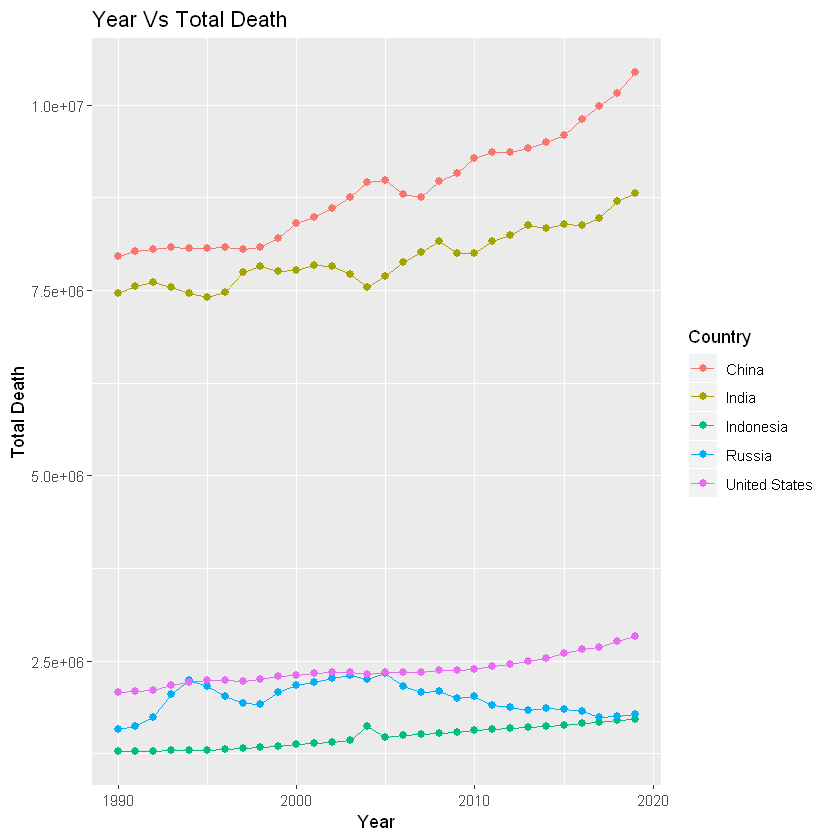

In [26]:
##Visualisation

##line chart showing Year Vs Total Death for top 5 countries with highest number of Death
ggplot(top5_data,aes(x=Year,y=total_death,group=Country,color=Country))+
  geom_line()+
  geom_point(size=2)+
labs(title ="Year Vs Total Death " ,x= "Year", y="Total Death")

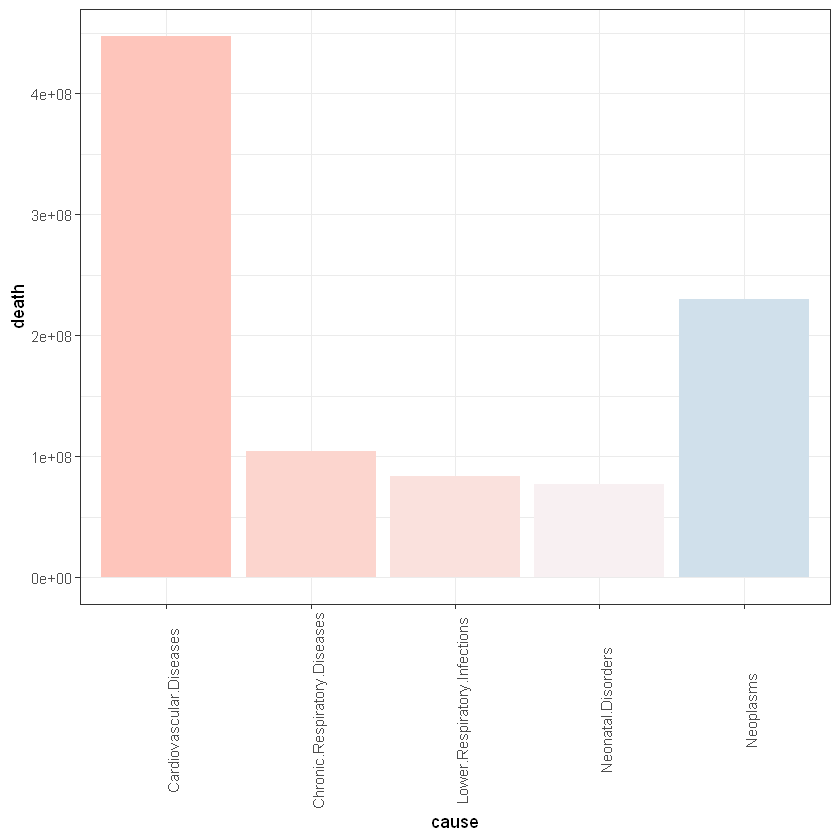

In [27]:
## Barchart showing top 5 causes of death
ggplot(top_5_cause_df,aes(x=cause,y=death))+
  geom_col(fill=c("#FEC5BB","#FCD5CE","#FAE1DD","#F8F0F2","#D0E0EB"))+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 90))

In [28]:
##For India
india<-year_wise_data%>%filter(Country%in%"India")
#Top 10 reason of death 
india_10<-head(sort(colSums(india[-c(1,2,3,35)]),decreasing=T),10)
india_10_df<-data.frame(cause=names(india_10),death=unname(india_10))
india_10_df

cause,death
Cardiovascular.Diseases,52994710
Diarrheal.Diseases,26243547
Chronic.Respiratory.Diseases,25232974
Neonatal.Disorders,20911570
Neoplasms,17762703
Lower.Respiratory.Infections,16419404
Tuberculosis,15820922
Digestive.Diseases,11804380
Cirrhosis.and.Other.Chronic.Liver.Diseases,6294910
Self.harm,5543395


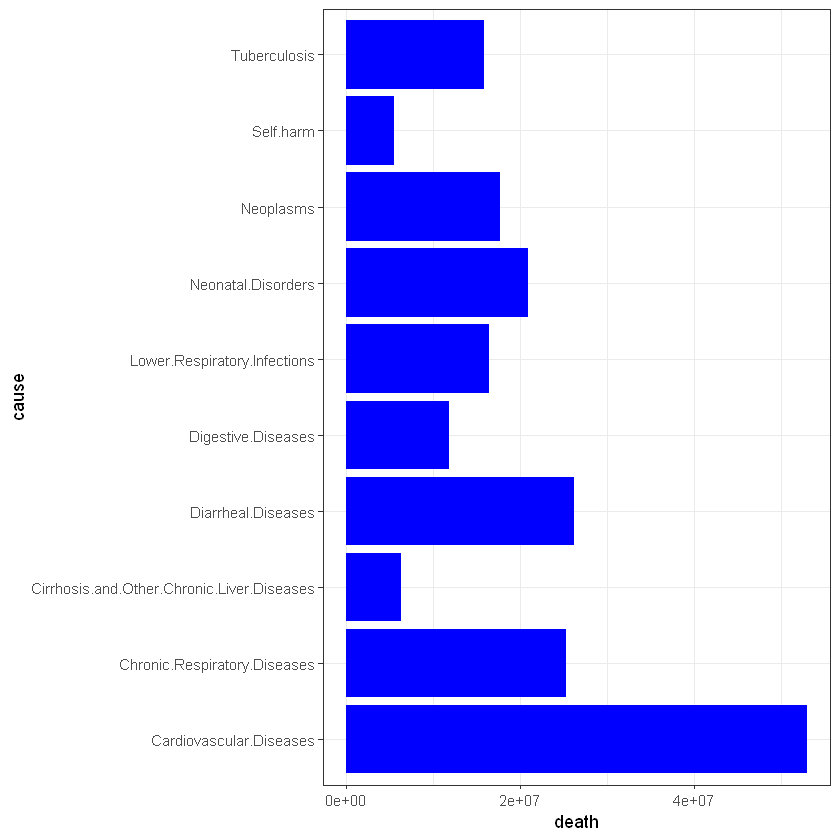

In [29]:
#Top 10 reason of death 
ggplot(india_10_df,aes(x=cause,y=death))+
  geom_col(fill="blue")+
  theme_bw()+
  coord_flip()

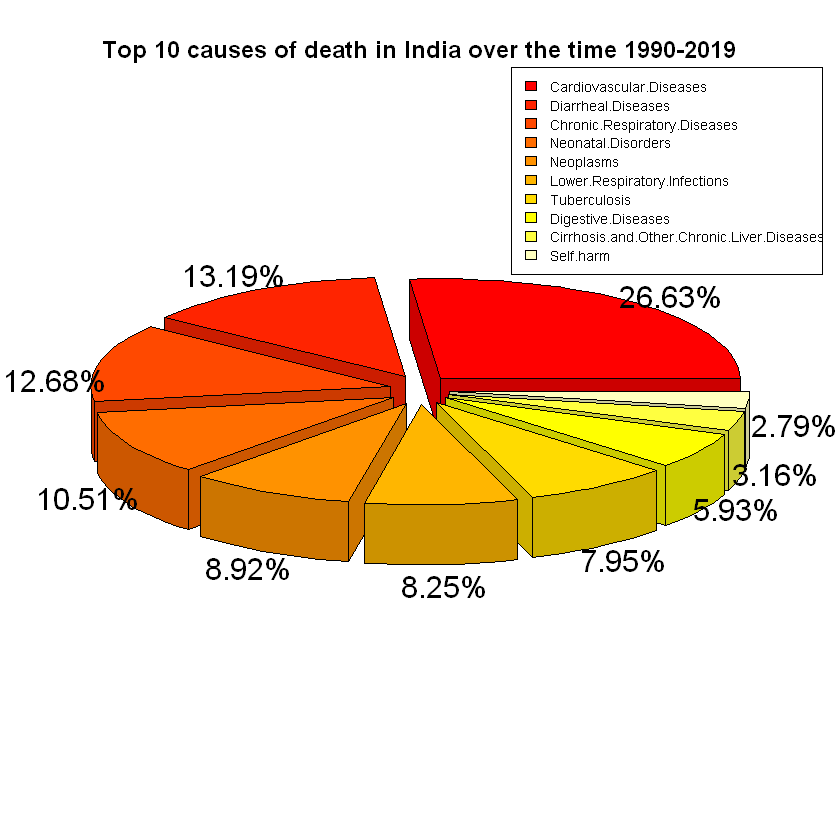

In [30]:
label <-paste(round(india_10_df[,2]*100/sum(india_10_df[,2]),2),"%",sep="")
pie3D(india_10_df$death,explode=0.1,labels=label,col = heat.colors(length(india_10_df$cause)),
      main="Top 10 causes of death in India over the time 1990-2019")
par(xpd = TRUE)
legend(0.2,0.9, legend = india_10_df$cause, cex=0.7, yjust=0.6, xjust = -0.1, 
       fill = heat.colors(length(india_10_df$cause)))    

In [31]:
##Analysing top 5 cause of disease
top_5_cause_df

cause,death
Cardiovascular.Diseases,447741982
Neoplasms,229758538
Chronic.Respiratory.Diseases,104605334
Lower.Respiratory.Infections,83770038
Neonatal.Disorders,76860729


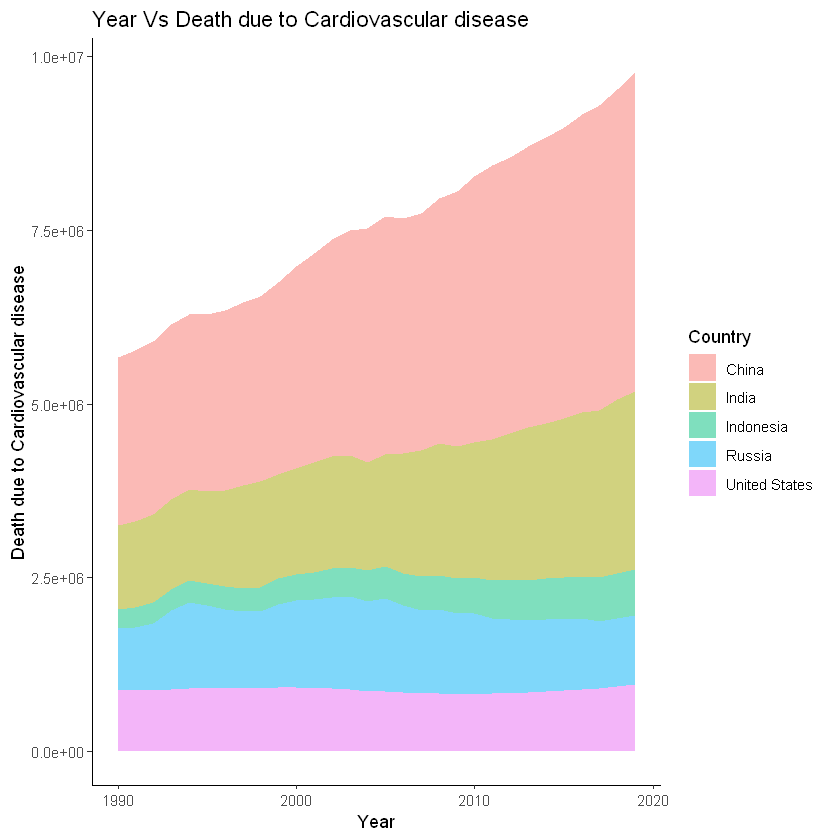

In [32]:
#1.Cardiovascular disease
death_data5<-data%>%filter(Country %in% c("China","India","United States", "Russia", "Indonesia"))
ggplot(death_data5,aes(x=Year,y=Cardiovascular.Diseases,group=Country,fill=Country))+
  geom_area(alpha=0.5)+
  labs(title ="Year Vs Death due to Cardiovascular disease " ,x= "Year", y="Death due to Cardiovascular disease")+
  theme_classic()

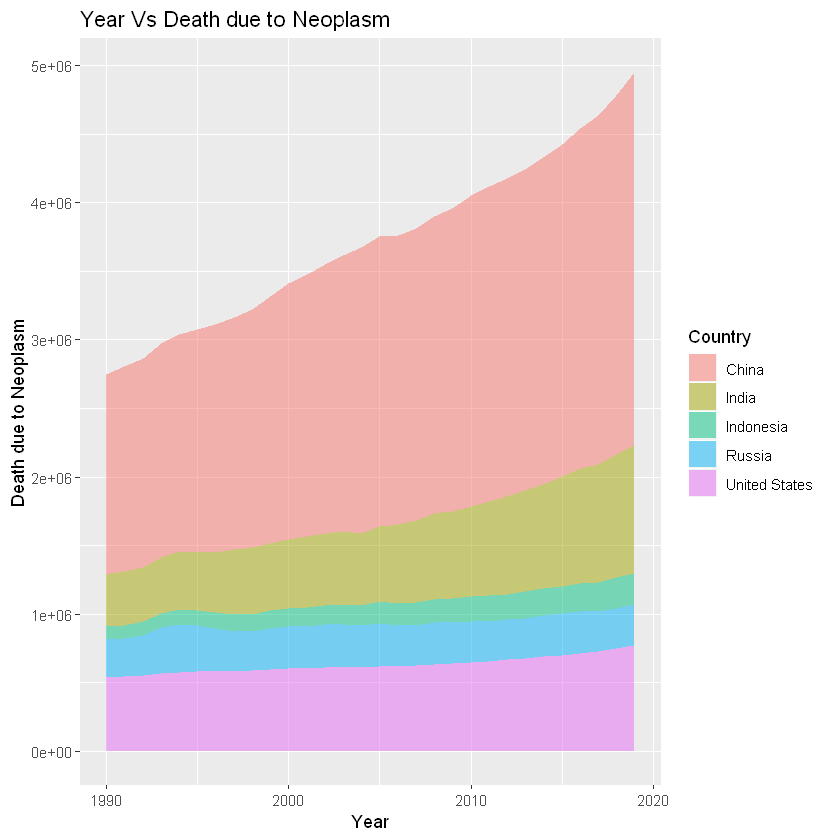

In [33]:
#2.Neoplasm
ggplot(death_data5,aes(x=Year,y=Neoplasms,group=Country,fill=Country))+
  geom_area(alpha=0.5)+
  labs(title ="Year Vs Death due to Neoplasm " ,x= "Year", y="Death due to Neoplasm")+
  theme_gray()

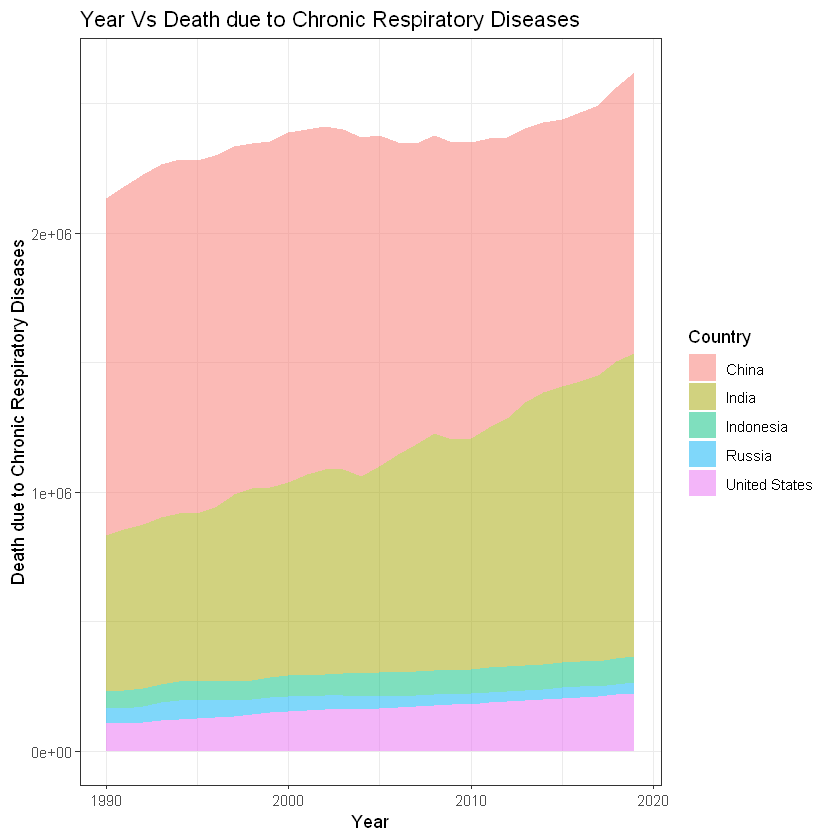

In [34]:
#3.Chronic Respiratory Diseases
ggplot(death_data5,aes(x=Year,y=Chronic.Respiratory.Diseases,group=Country,fill=Country))+
  geom_area(alpha=0.5)+
  labs(title ="Year Vs Death due to Chronic Respiratory Diseases " ,x= "Year", y="Death due to Chronic Respiratory Diseases")+
  theme_bw()

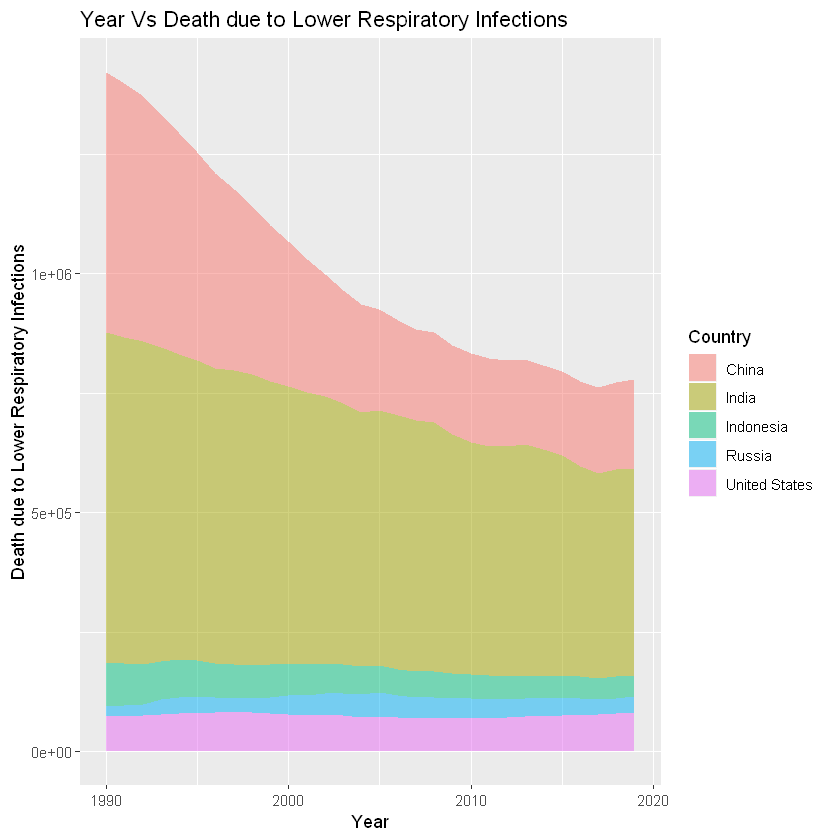

In [35]:
#4.Lower Respiratory Infections
ggplot(death_data5,aes(x=Year,y=Lower.Respiratory.Infections,group=Country,fill=Country))+
  geom_area(alpha=0.5)+
  labs(title ="Year Vs Death due to Lower Respiratory Infections " ,x= "Year", y="Death due to Lower Respiratory Infections")+
  theme_get()

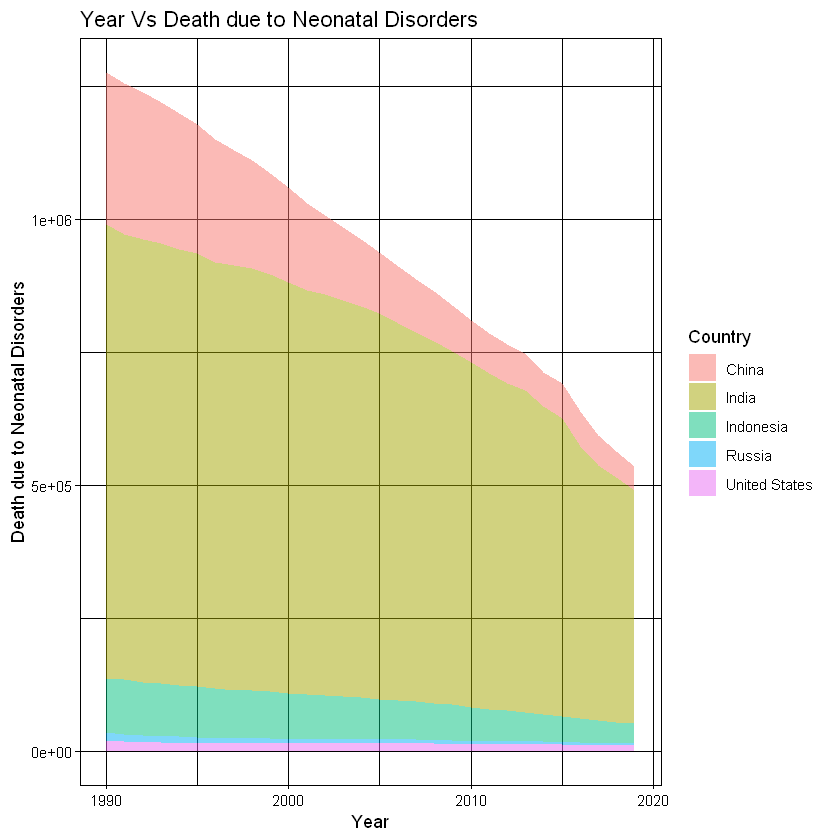

In [36]:
#5.Neonatal Disorders
ggplot(death_data5,aes(x=Year,y=Neonatal.Disorders,group=Country,fill=Country))+
  geom_area(alpha=0.5)+
  labs(title ="Year Vs Death due to Neonatal Disorders " ,x= "Year", y="Death due to Neonatal Disorders")+
  theme_linedraw()